In [0]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
df = spark.sql("select * from HouseSensor")
df = df.coalesce(24)
df.cache()

Out[3]: DataFrame[house: string, lastSensorEventHours: int, lastSensorEventSeconds: int, lastSensorDayOfWeek: int, windowDuration: int, timeSinceLastSensorEvent: int, prevDominantSensor1: int, prevDominantSensor2: int, lastSensorID: int, lastSensorLocation: int, lastMotionLocation: int, complexity: double, activityChange: double, areaTransitions: int, numDistinctSensors: int, sensorCount_Bathroom: double, sensorCount_Bedroom: double, sensorCount_Chair: double, sensorCount_DiningRoom: double, sensorCount_Hall: double, sensorCount_Ignore: double, sensorCount_Kitchen: double, sensorCount_LivingRoom: double, sensorCount_Office: double, sensorCount_OutsideDoor: double, sensorCount_WorkArea: double, sensorElTime_Bathroom: double, sensorElTime_Bedroom: double, sensorElTime_Chair: double, sensorElTime_DiningRoom: double, sensorElTime_Hall: double, sensorElTime_Ignore: double, sensorElTime_Kitchen: double, sensorElTime_LivingRoom: double, sensorElTime_Office: double, sensorElTime_OutsideDoor: double, sensorElTime_WorkArea: double, activity: string]

In [0]:
group_count = df.groupby(['activity']).count()
group_count.show()

+--------------------+------+
 activity| count|
+--------------------+------+
 Drink|160087|
Bed_Toilet_Transi...| 67662|
 Wash_Dishes|223478|
 Work_At_Table|106263|
 Groom|248803|
 Personal_Hygiene|612180|
 Read|125697|
 Cook_Lunch|184127|
 Wash_Lunch_Dishes| 53811|
 Eat_Dinner| 56408|
 Leave_Home| 84324|
 Eat_Breakfast| 75159|
 Work|102986|
 Dress|400172|
 Relax| 94476|
 Cook|181677|
 Morning_Meds| 44952|
 Toilet|277863|
 Phone| 68651|
 Cook_Dinner|351638|
+--------------------+------+
only showing top 20 rows

In [0]:
count_df = group_count.toPandas()

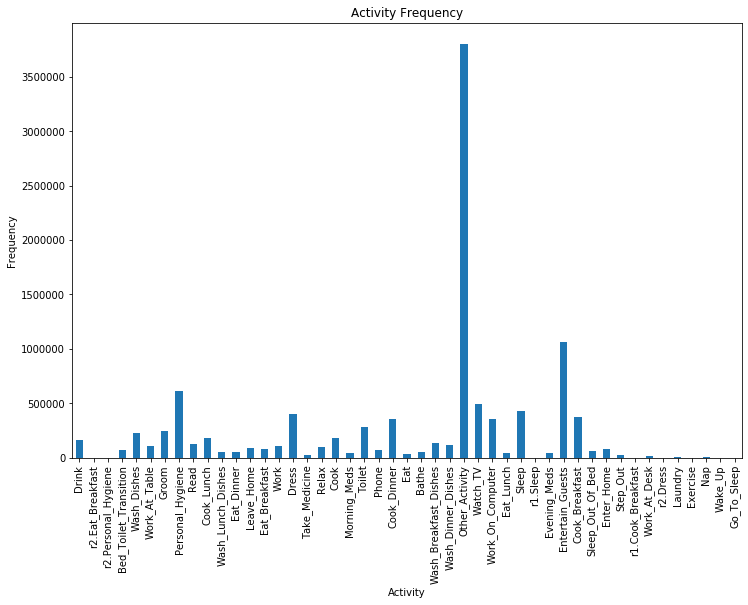

In [0]:
freq_series = pd.Series(count_df['count'].values)


# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Activity Frequency')
ax.set_xlabel('Activity')
ax.set_ylabel('Frequency')
ax.set_xticklabels(count_df['activity'].values)

rects = ax.patches

# Make some labels.
labels = ["label%d" % i for i in xrange(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')